In [1]:
!pip install PySUS seaborn plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 4.9 MB/s 
     |████████████████████████████████| 11.7 MB 44.9 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 1.6 MB 39.2 MB/s 
     |████████████████████████████████| 385 kB 58.1 MB/s 
     |████████████████████████████████| 26.7 MB 131.7 MB/s 
     |████████████████████████████████| 78 kB 7.1 MB/s 
     |████████████████████████████████| 2.0 MB 55.2 MB/s 
  Created wheel for PySUS: filename=PySUS-0.6.0-cp38-cp38-linux_x86_64.whl size=1440625 sha256=28e4c5a61ecb8792b958618c53053bc5708820bda41780cbc3f528b2f16f1278
  Stored in directory: /root/.cache/pip/wheels/6a/91/14/0df46b481a82ab3041ffc532b78390a1b0281cb010d0a42238
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26787 sha256=ec43fe11b57efc26ac3d466cb64d7f77882931ee2b04d60cabb1a08e4cdf77d3
  Stored in direct

In [8]:
from pysus.online_data.CNES import download
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt


In [2]:
# testando pra 1 mes e 1 ano espefico
df = download(group = 'LT', state='GO',month='1', year= '2022')

In [3]:
#Generalizando
anos = range(2005,2023)
meses = range(1,13)
banco=[]

for y in anos:
    for m in meses:
        try:
            valores = download(group = 'LT', state='GO',month=m, year= y)
            valores['ano'] = y
            valores['mes'] = m
            banco.append(valores)

        except Exception as E:
            print(E)
            pass


CNES does not contain data for 2005-01-01 00:00:00
CNES does not contain data for 2005-02-01 00:00:00
CNES does not contain data for 2005-03-01 00:00:00
CNES does not contain data for 2005-04-01 00:00:00
CNES does not contain data for 2005-05-01 00:00:00
CNES does not contain data for 2005-06-01 00:00:00
CNES does not contain data for 2005-07-01 00:00:00
CNES does not contain data for 2005-08-01 00:00:00
CNES does not contain data for 2005-09-01 00:00:00
File LTGO2212.dbc not available


In [6]:
# concatenar banco
df = pd.concat(banco)
df.head()

,CNES,CODUFMUN,REGSAUDE,MICR_REG,DISTRSAN,DISTRADM,TPGESTAO,PF_PJ,CPF_CNPJ,NIV_DEP,...,TP_LEITO,CODLEITO,QT_EXIST,QT_CONTR,QT_SUS,QT_NSUS,COMPETEN,ano,mes,NAT_JUR
0,2384035,521950,1,,,,D,3,00000000000000,3,...,1,03,4,0,4,0,200510,2005,10,NaN
1,2384035,521950,1,,,,D,3,00000000000000,3,...,4,43,2,0,2,0,200510,2005,10,NaN
2,2384035,521950,1,,,,D,3,00000000000000,3,...,4,10,2,0,2,0,200510,2005,10,NaN
3,2384035,521950,1,,,,D,3,00000000000000,3,...,5,45,6,0,6,0,200510,2005,10,NaN
4,2384035,521950,1,,,,D,3,00000000000000,3,...,2,33,6,0,6,0,200510,2005,10,NaN


# 1 Gráfico

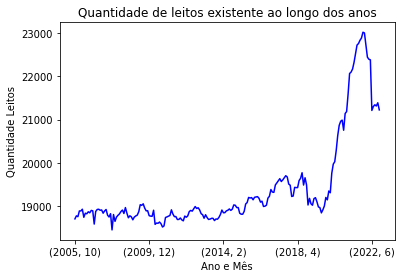

In [11]:
# converter para datetime
df['COMPETEN'] = pd.to_datetime(df['COMPETEN'], format='%Y%m')

df.groupby(['ano', 'mes'])['QT_EXIST'].sum().plot(color=['red' if x > 2015 else 'blue' for x in df['ano']])
plt.title("Quantidade de leitos existente ao longo dos anos")
plt.xlabel("Ano e Mês")
plt.ylabel("Quantidade Leitos")
plt.show()

# 2 Grafico 

,ano,mes,QT_SUS,QT_NSUS
0,2005,10,13774,4933
1,2005,11,13868,4909
2,2005,12,13854,4904
3,2006,1,13936,4954
4,2006,2,13946,4944
...,...,...,...,...
201,2022,7,12819,8484
202,2022,8,12988,8355
203,2022,9,12942,8373
204,2022,10,13096,8293


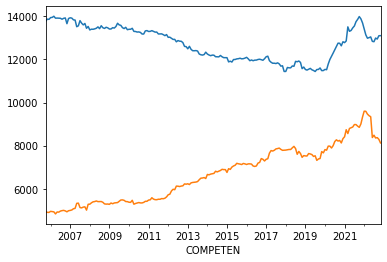

In [20]:
df.set_index('COMPETEN')['QT_SUS'].resample('M').sum().plot()

df.set_index('COMPETEN')['QT_NSUS'].resample('M').sum().plot()

df.groupby(['ano', 'mes'])[['QT_SUS', 'QT_NSUS']].sum().reset_index()

<ipython-input-14-3b1292197a9d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['ano', 'mes'])['QT_SUS', 'QT_NSUS'].sum().plot()


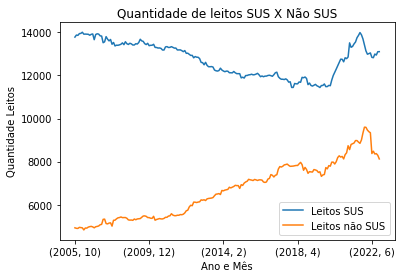

In [14]:
# Comparar a quantidade de leitos SUS e leitos não SUS no tempo e no espaço
df.groupby(['ano', 'mes'])['QT_SUS', 'QT_NSUS'].sum().plot()
plt.title("Quantidade de leitos SUS X Não SUS")
plt.xlabel("Ano e Mês")
plt.ylabel("Quantidade Leitos")
plt.legend(['Leitos SUS', 'Leitos não SUS'])
plt.show()

# Melhorando os graficos com Plotly


## 1 Gráfico

In [19]:
import plotly.graph_objs as go

df['COMPETEN'] = pd.to_datetime(df['COMPETEN'], format='%Y%m')
df_plotly = df.set_index('COMPETEN')['QT_EXIST'].resample('M').sum().reset_index()

data = [
    go.Scatter(
        x=df_plotly[df_plotly['COMPETEN'] <= '2019-12-31']['COMPETEN'],
        y=df_plotly[df_plotly['COMPETEN'] <= '2019-12-31']['QT_EXIST'],
        mode='lines',
        name='Antes da Pandemia COVID-19',
        marker=dict(color='blue')
    ),
    go.Scatter(
        x=df_plotly[df_plotly['COMPETEN'] >= '2019-12-31']['COMPETEN'],
        y=df_plotly[df_plotly['COMPETEN'] >= '2019-12-31']['QT_EXIST'],
        mode='lines',
        name='Depois da Pandemia COVID-19',
        marker=dict(color='red')
    )
]

layout = go.Layout(
    title="Quantidade de leitos existente ao longo dos anos no estado de GOIAS - Brasil",
    xaxis=dict(title="Ano e Mês", tickformat="%Y-%m"),
    yaxis=dict(title="Quantidade de leitos")
)

fig = go.Figure(data=data, layout=layout)

# tooltip
fig.update_traces(hovertemplate='<b>Qtd Leitos: %{y}</b><extra></extra>')
fig.update_layout(hovermode='x unified')

# Anotação
fig.add_shape(
    type="circle",
    xref="x",
    yref="y",
    x0="2022-05-31",
    y0=21100,
    x1="2022-08-31",
    y1=21400,
    line=dict(
        color="black",
        width=3,
        dash="dashdot"
    )
)

# Label da Anotação
fig.add_annotation(
    x="2022-05-31",
    y=21100,
    text="Declínio na capacidade hospitalar instalada.",
    showarrow=True,
    arrowhead=1,
    # ax=-300,
    ax=-100,
    # ay=-100
    ay=230
)


fig.show()


## Segundo Gráfico

In [22]:
df_plotly = df.set_index('COMPETEN')[['QT_SUS', 'QT_NSUS']].resample('M').sum().reset_index()

data = [
    go.Scatter(
        x=df_plotly[df_plotly['COMPETEN'] <= '2019-12-31']['COMPETEN'],
        y=df_plotly[df_plotly['COMPETEN'] <= '2019-12-31']['QT_SUS'],
        mode='lines',
        name='Quantidade de leitos SUS Antes da Pandemia COVID-19',
        marker=dict(color='lightblue')
    ),
    go.Scatter(
        x=df_plotly[df_plotly['COMPETEN'] >= '2019-12-31']['COMPETEN'],
        y=df_plotly[df_plotly['COMPETEN'] >= '2019-12-31']['QT_SUS'],
        mode='lines',
        name='Quantidade de leitos SUS Depois da Pandemia COVID-19',
        marker=dict(color='darkblue')
    ),

    go.Scatter(
        x=df_plotly[df_plotly['COMPETEN'] <= '2019-12-31']['COMPETEN'],
        y=df_plotly[df_plotly['COMPETEN'] <= '2019-12-31']['QT_NSUS'],
        mode='lines',
        name='Quantidade de leitos não SUS Antes da Pandemia COVID-19',
        marker=dict(color='#FFCCCB')
    ),
    go.Scatter(
        x=df_plotly[df_plotly['COMPETEN'] >= '2019-12-31']['COMPETEN'],
        y=df_plotly[df_plotly['COMPETEN'] >= '2019-12-31']['QT_NSUS'],
        mode='lines',
        name='Quantidade de leitos não SUS Depois da Pandemia COVID-19',
        marker=dict(color='red')
    )
]

layout = go.Layout(
    title="Quantidade de leitos SUS e não SUS ao longo dos anos no estado de GOIAS - Brasil",
    xaxis=dict(title="Ano e Mês", tickformat="%Y-%m"),
    yaxis=dict(title="Quantidade de leitos")
)

fig = go.Figure(data=data, layout=layout)

# tooltip
fig.update_traces(hovertemplate='<b>Qtd Leitos: %{y}</b><extra></extra>')
fig.update_layout(hovermode='x unified')


fig.show()

    